In [ ]:
!pip install -q timm opencv-python matplotlib Pillow
!pip install datasets

import os
import requests
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from tqdm import tqdm
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import timm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 17.9 MB/s eta 0:00:00


In [ ]:
def convert_to_binary_mask(mask_img):
    mask_rgb = np.array(mask_img.convert("RGB"))
    # Edited areas are black: [0, 0, 0]
    binary_mask = np.all(mask_rgb == [0, 0, 0], axis=-1).astype(np.uint8) * 255  # white = edited
    return Image.fromarray(binary_mask, mode="L")

In [ ]:
def save_mask(raw_mask, index, convert_mask=False):
    resize_size = (512, 512)

    if convert_mask:
        mask = convert_to_binary_mask(raw_mask)
    else:
        mask = raw_mask.convert("L")
    mask = mask.resize(resize_size, Image.NEAREST)
    mask_path = f"data/masks/mask_{index:05d}.png"
    mask.save(mask_path)

In [ ]:
def save_img(img, index, convert_mask=False):
    resize_size = (512, 512)
    img = img.convert("RGB").resize(resize_size, Image.BILINEAR)
    img_path = f"data/images/img_{index:05d}.jpg"

    img.save(img_path)

In [ ]:
def save_pair(img, raw_mask, index, convert_mask=False):
    resize_size = (512, 512)

    img = img.convert("RGB").resize(resize_size, Image.BILINEAR)
    img_path = f"data/images/img_{index:05d}.jpg"
    img.save(img_path)

    if convert_mask:
        mask = convert_to_binary_mask(raw_mask)
    else:
        mask = raw_mask.convert("L")

    mask = mask.resize(resize_size, Image.NEAREST)
    mask_path = f"data/masks/mask_{index:05d}.png"
    mask.save(mask_path)

In [ ]:
from itertools import islice
from datasets import load_dataset
import os
from PIL import Image
from tqdm import tqdm


dataset = load_dataset("BryanW/HumanEdit", split="train")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/2.49k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/34 [00:00<?, ?it/s]

(…)-00000-of-00034-d4bc386d6caf62fb.parquet:   0%|          | 0.00/454M [00:00<?, ?B/s]

(…)-00001-of-00034-822313fd65281835.parquet:   0%|          | 0.00/424M [00:00<?, ?B/s]

(…)-00002-of-00034-c7fb3c21a516ec2c.parquet:   0%|          | 0.00/490M [00:00<?, ?B/s]

(…)-00003-of-00034-9b77bb1da8f3e008.parquet:   0%|          | 0.00/530M [00:00<?, ?B/s]

(…)-00004-of-00034-7fffbdc560482a31.parquet:   0%|          | 0.00/538M [00:00<?, ?B/s]

(…)-00005-of-00034-ba219ad346ef60ce.parquet:   0%|          | 0.00/509M [00:00<?, ?B/s]

(…)-00006-of-00034-3753b8775b6033f6.parquet:   0%|          | 0.00/523M [00:00<?, ?B/s]

(…)-00007-of-00034-cee93102372ec1a7.parquet:   0%|          | 0.00/472M [00:00<?, ?B/s]

(…)-00008-of-00034-37561f9e3fac8178.parquet:   0%|          | 0.00/515M [00:00<?, ?B/s]

(…)-00009-of-00034-af31fd800f9abf74.parquet:   0%|          | 0.00/470M [00:00<?, ?B/s]

(…)-00010-of-00034-620a6743355afecb.parquet:   0%|          | 0.00/441M [00:00<?, ?B/s]

(…)-00011-of-00034-15064a8dd2f007e8.parquet:   0%|          | 0.00/503M [00:00<?, ?B/s]

(…)-00012-of-00034-858bad23f2c47aa8.parquet:   0%|          | 0.00/492M [00:00<?, ?B/s]

(…)-00013-of-00034-383e8c49db6af26e.parquet:   0%|          | 0.00/518M [00:00<?, ?B/s]

(…)-00014-of-00034-f5a022605600a199.parquet:   0%|          | 0.00/496M [00:00<?, ?B/s]

(…)-00015-of-00034-844251aad179124e.parquet:   0%|          | 0.00/541M [00:00<?, ?B/s]

(…)-00016-of-00034-142cd7f7f5846d6d.parquet:   0%|          | 0.00/499M [00:00<?, ?B/s]

(…)-00017-of-00034-7ba280c9a805ec9a.parquet:   0%|          | 0.00/455M [00:00<?, ?B/s]

(…)-00018-of-00034-97607d160cf642fb.parquet:   0%|          | 0.00/501M [00:00<?, ?B/s]

(…)-00019-of-00034-1a356b75467e13d3.parquet:   0%|          | 0.00/530M [00:00<?, ?B/s]

(…)-00020-of-00034-be289e16c52e443a.parquet:   0%|          | 0.00/479M [00:00<?, ?B/s]

(…)-00021-of-00034-c460dea8f591a811.parquet:   0%|          | 0.00/514M [00:00<?, ?B/s]

(…)-00022-of-00034-96acae3507199147.parquet:   0%|          | 0.00/507M [00:00<?, ?B/s]

(…)-00023-of-00034-67bb45a75440676c.parquet:   0%|          | 0.00/473M [00:00<?, ?B/s]

(…)-00024-of-00034-b960059c08b82921.parquet:   0%|          | 0.00/446M [00:00<?, ?B/s]

(…)-00025-of-00034-d452fbd4291236c5.parquet:   0%|          | 0.00/459M [00:00<?, ?B/s]

(…)-00026-of-00034-33930c77334abfba.parquet:   0%|          | 0.00/409M [00:00<?, ?B/s]

(…)-00027-of-00034-a147568562694c41.parquet:   0%|          | 0.00/415M [00:00<?, ?B/s]

(…)-00028-of-00034-397fc348ca175828.parquet:   0%|          | 0.00/414M [00:00<?, ?B/s]

(…)-00029-of-00034-d4529d3619a2a30d.parquet:   0%|          | 0.00/429M [00:00<?, ?B/s]

(…)-00030-of-00034-f0e63a7fd03eaeaf.parquet:   0%|          | 0.00/425M [00:00<?, ?B/s]

(…)-00031-of-00034-cf8f76f6b59658a1.parquet:   0%|          | 0.00/467M [00:00<?, ?B/s]

(…)-00032-of-00034-fc320d276b19c097.parquet:   0%|          | 0.00/500M [00:00<?, ?B/s]

(…)-00033-of-00034-8404b6591ad0d14c.parquet:   0%|          | 0.00/533M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5751 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/21 [00:00<?, ?it/s]

In [ ]:
os.makedirs("/content/data/images", exist_ok=True)  # Create images directory
os.makedirs("/content/data/masks", exist_ok=True)   # Create masks directory

for i, entry in enumerate(tqdm(dataset)):
    save_pair(entry["INPUT_IMG"], entry["MASK_IMG"], i, convert_mask=True)

100%|██████████| 5751/5751 [15:26<00:00,  6.21it/s]


In [ ]:
del dataset

In [ ]:
pipe_dataset_stream = load_dataset("paint-by-inpaint/PIPE", split="train", streaming=True)
pipe_dataset = list(islice(pipe_dataset_stream, 4300))

README.md:   0%|          | 0.00/5.16k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/162 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/162 [00:00<?, ?it/s]

In [ ]:
counter = len(os.listdir("/content/data/images"))
for i, entry in enumerate(tqdm(pipe_dataset)):
    save_img(entry["target_img"], counter + i)

100%|██████████| 4300/4300 [00:07<00:00, 572.18it/s]


In [ ]:
del pipe_dataset, pipe_dataset_stream

In [ ]:
mask_dataset_stream = load_dataset("paint-by-inpaint/PIPE_Masks", split="train", streaming=True)
mask_dataset = list(islice(mask_dataset_stream, 4300))

README.md:   0%|          | 0.00/1.89k [00:00<?, ?B/s]

In [ ]:
counter = len(os.listdir("/content/data/masks"))
print(counter)
for i, entry in enumerate(tqdm(mask_dataset)):
    save_mask(entry["mask"], counter + i)

5751


100%|██████████| 4300/4300 [00:12<00:00, 340.12it/s]


In [ ]:
del mask_dataset, mask_dataset_stream

In [ ]:
print(len(os.listdir("/content/data/images")))
print(len(os.listdir("/content/data/masks")))

10051
10051


In [ ]:
import torch.nn.functional as F

class StabilityPredictor(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = timm.create_model("convnext_tiny", pretrained=True, features_only=True)
        self.decoder = nn.Sequential(
            nn.Conv2d(768, 256, 3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(256, 64, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 1, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)[-1]              # [B, 96, 8, 8]
        x = self.decoder(x)                  # [B, 1, 16, 16]
        x = F.interpolate(x, size=(256, 256), mode='bilinear', align_corners=False)
        return x

In [ ]:
class StabilityDataset(Dataset):
    def __init__(self, image_dir, mask_dir):
        self.image_paths = sorted(os.listdir(image_dir))
        self.mask_paths = sorted(os.listdir(mask_dir))
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.ToTensor()
        ])

    def __len__(self):
        return min(len(self.image_paths), len(self.mask_paths))

    def __getitem__(self, idx):
        image_path = os.path.join(self.image_dir, self.image_paths[idx])
        mask_path = os.path.join(self.mask_dir, self.mask_paths[idx])

        image = Image.open(image_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")

        return self.transform(image), self.transform(mask)

dataset = StabilityDataset("/content/data/images", "/content/data/masks")
loader = DataLoader(dataset, batch_size=4, shuffle=True)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = StabilityPredictor().to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)
loss_fn = nn.BCELoss(reduction='none')

for epoch in range(30):
    model.train()
    total_loss = 0
    for imgs, masks in loader:
        imgs, masks = imgs.to(device), masks.to(device)
        preds = model(imgs)

        weights = masks * 12 + 1
        loss = loss_fn(preds, masks)
        weighted_loss = (loss * weights).mean()

        optimizer.zero_grad()
        weighted_loss.backward()
        optimizer.step()
        total_loss += weighted_loss.item()
    print(f"Epoch {epoch+1}: Loss = {total_loss / len(loader):.4f}")
torch.save(model.state_dict(), "/content/drive/MyDrive/stability_predictor.pth")

Epoch 1: Loss = 1.4033
Epoch 2: Loss = 1.3390
Epoch 3: Loss = 1.2628
Epoch 4: Loss = 1.1966
Epoch 5: Loss = 1.1010
Epoch 6: Loss = 0.9735
Epoch 7: Loss = 0.8235
Epoch 8: Loss = 0.6951
Epoch 9: Loss = 0.6061
Epoch 10: Loss = 0.5417
Epoch 11: Loss = 0.5048
Epoch 12: Loss = 0.4699
Epoch 13: Loss = 0.4318
Epoch 14: Loss = 0.4111
Epoch 15: Loss = 0.4164
Epoch 16: Loss = 0.3829
Epoch 17: Loss = 0.3622
Epoch 18: Loss = 0.3680
Epoch 19: Loss = 0.3496
Epoch 20: Loss = 0.3217
Epoch 21: Loss = 0.3216
Epoch 22: Loss = 0.3271
Epoch 23: Loss = 0.2968
Epoch 24: Loss = 0.3212
Epoch 25: Loss = 0.3147
Epoch 26: Loss = 0.2974
Epoch 27: Loss = 0.2820
Epoch 28: Loss = 0.2903
Epoch 29: Loss = 0.2869
Epoch 30: Loss = 0.2814


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = StabilityPredictor().to(device)
torch.save(model.state_dict(), "/content/drive/MyDrive/stability_predictor.pth")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/114M [00:00<?, ?B/s]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

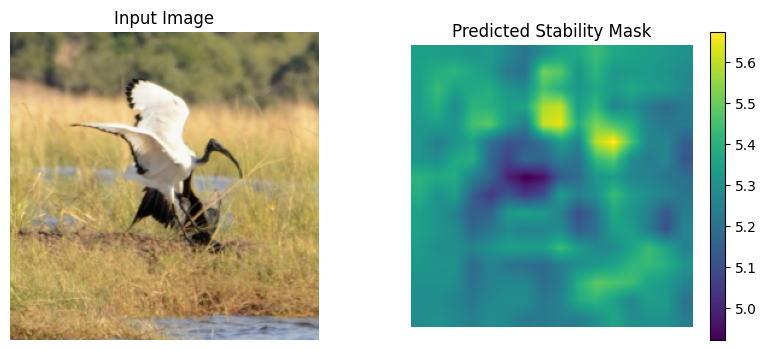

In [ ]:
model.eval()
img_path = '/content/img_00952_wm.png'

img = Image.open(img_path).convert("RGB")
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])
img = transform(img)

with torch.no_grad():
    pred = model(img.unsqueeze(0).to(device)).squeeze().cpu().numpy()

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img.permute(1, 2, 0))
plt.title("Input Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(pred*10)
plt.title("Predicted Stability Mask")
plt.colorbar()
plt.axis("off")
plt.show()

**TESTING**

In [ ]:
!pip install -q timm opencv-python matplotlib Pillow
!pip install datasets
import torch.nn.functional as F
from itertools import islice
from datasets import load_dataset
import os
from PIL import Image
from tqdm import tqdm
import requests
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import timm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def save_mask_test(raw_mask, index, convert_mask=False):
    resize_size = (512, 512)

    if convert_mask:
        mask = convert_to_binary_mask(raw_mask)
    else:
        mask = raw_mask.convert("L")
    mask = mask.resize(resize_size, Image.NEAREST)
    mask_path = f"test/masks/mask_{index:05d}.png"
    mask.save(mask_path)

In [ ]:
def save_img_test(img, index, convert_mask=False):
    resize_size = (512, 512)
    img = img.convert("RGB").resize(resize_size, Image.BILINEAR)
    img_path = f"test/images/img_{index:05d}.jpg"

    img.save(img_path)

In [ ]:
os.makedirs("/content/test/images", exist_ok=True)
os.makedirs("/content/test/masks", exist_ok=True)

In [ ]:
from datasets import load_dataset

In [ ]:
pipe_dataset_stream = load_dataset("paint-by-inpaint/PIPE", split="train", streaming=True)
pipe_dataset_test = list(islice(pipe_dataset_stream, 4300, 5000))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/5.16k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/162 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/162 [00:00<?, ?it/s]

In [ ]:
counter = 0
for i, entry in enumerate(tqdm(pipe_dataset_test)):
    save_img_test(entry["target_img"], counter + i)

100%|██████████| 700/700 [00:01<00:00, 572.83it/s]


In [ ]:
del pipe_dataset_stream, pipe_dataset_test

In [ ]:
mask_dataset_stream = load_dataset("paint-by-inpaint/PIPE_Masks", split="train", streaming=True)
mask_dataset_test = list(islice(mask_dataset_stream, 4300, 5000))

README.md:   0%|          | 0.00/1.89k [00:00<?, ?B/s]

In [ ]:
counter = 0
print(counter)
for i, entry in enumerate(tqdm(mask_dataset_test)):
    save_mask_test(entry["mask"], counter + i)

0


100%|██████████| 700/700 [00:02<00:00, 337.97it/s]


In [ ]:
del mask_dataset_stream, mask_dataset_test

In [ ]:
print(len(os.listdir("/content/test/images")))
print(len(os.listdir("/content/test/masks")))

700
700


In [ ]:
import torch.nn.functional as F

class StabilityPredictor(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = timm.create_model("convnext_tiny", pretrained=True, features_only=True)
        self.decoder = nn.Sequential(
            nn.Conv2d(768, 256, 3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(256, 64, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 1, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)[-1]              # [B, 96, 8, 8]
        x = self.decoder(x)                  # [B, 1, 16, 16]
        x = F.interpolate(x, size=(256, 256), mode='bilinear', align_corners=False)
        return x

In [ ]:
class StabilityTestDataset(Dataset):
    def __init__(self, image_dir, mask_dir):
        self.image_paths = sorted(os.listdir(image_dir))
        self.mask_paths = sorted(os.listdir(mask_dir))
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.ToTensor()
        ])

    def __len__(self):
        return min(len(self.image_paths), len(self.mask_paths))

    def __getitem__(self, idx):
        image = Image.open(os.path.join(self.image_dir, self.image_paths[idx])).convert("RGB")
        mask = Image.open(os.path.join(self.mask_dir, self.mask_paths[idx])).convert("L")
        return self.transform(image), self.transform(mask)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
# Load model
model = StabilityPredictor().to(device)
model.load_state_dict(torch.load("/content/drive/MyDrive/stability_predictor.pth"))
model.eval()

# Load test data
test_dataset = StabilityTestDataset("/content/test/images", "/content/test/masks")
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

model.safetensors:   0%|          | 0.00/114M [00:00<?, ?B/s]

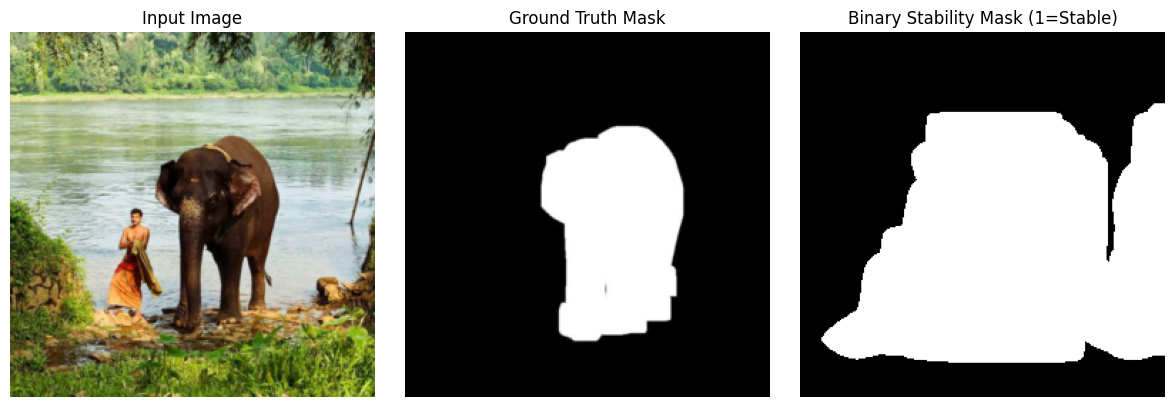

In [ ]:
import matplotlib.pyplot as plt
import torch

img, mask = test_dataset[416]
with torch.no_grad():
    pred = model(img.unsqueeze(0).to(device)).squeeze().cpu().numpy()

flat = pred.flatten()
k = flat.size // 2
threshold = torch.topk(torch.tensor(flat), k=k, largest=True).values[-1].item()
binary_mask = (pred >= threshold).astype(float)
binary_mask = binary_mask.reshape(pred.shape)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img.permute(1, 2, 0))
plt.title("Input Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(mask.squeeze(), cmap="gray")
plt.title("Ground Truth Mask")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(binary_mask, cmap="gray")
plt.title("Binary Stability Mask (1=Stable)")
plt.axis("off")

plt.tight_layout()
plt.show()


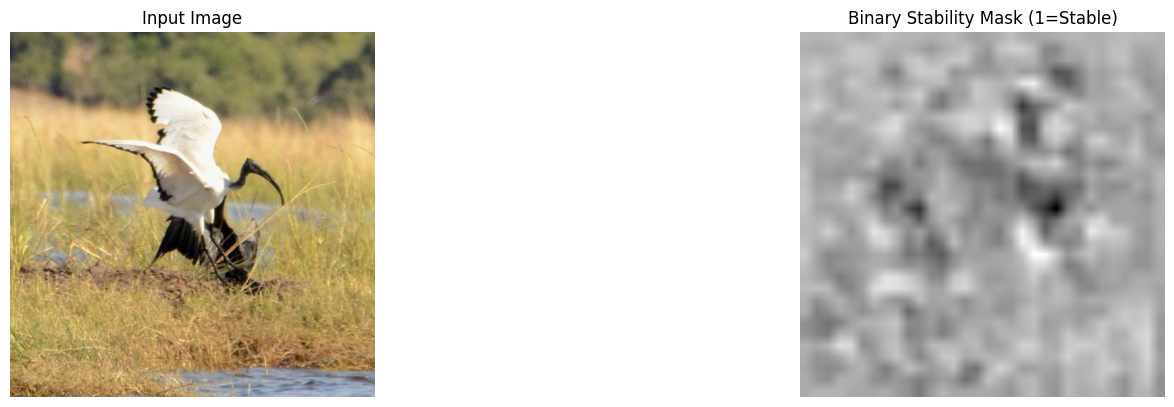

In [ ]:
import matplotlib.pyplot as plt
import torch

img_path = '/content/img_00952_wm.png'

img = Image.open(img_path).convert("RGB")
transform = transforms.Compose([
    transforms.ToTensor()
])
img = transform(img)

with torch.no_grad():
    pred = model(img.unsqueeze(0).to(device)).squeeze().cpu().numpy()


plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img.permute(1, 2, 0))
plt.title("Input Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(pred, cmap="gray")
plt.title("Binary Stability Mask (1=Stable)")
plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
total_correct_unstable = 0
total_edited = 0
batches = 0

model.eval()
with torch.no_grad():
    for imgs, masks in test_loader:
        imgs, masks = imgs.to(device), masks.to(device)
        preds = model(imgs)

        B, _, H, W = preds.shape
        preds_flat = preds.view(B, -1)

        k = (H * W) // 2
        topk_vals, topk_indices = torch.topk(preds_flat, k=k, largest=True, dim=1)  # highest = most unstable

        binary_mask_flat = torch.zeros_like(preds_flat)
        binary_mask_flat.scatter_(1, topk_indices, 1.0)

        predicted_unstable = binary_mask_flat.view(B, 1, H, W)

        correct_unstable = ((predicted_unstable == 1) & (masks == 1)).sum(dim=(1, 2, 3)).float()
        total_edited_region = (masks == 1).sum(dim=(1, 2, 3)).float()

        total_correct_unstable += correct_unstable.sum()
        total_edited += total_edited_region.sum()
        batches += 1

recall_on_edited = total_correct_unstable / (total_edited + 1e-8)

print(f"% of Edited Region Correctly Predicted as Unstable: {recall_on_edited:.4f}")


NameError: name 'model' is not defined